# Understanding Supervised Regression Models

Use supervised regression techniques to **predict daily bicycle rentals for a bike-sharing service**. **Using historical data, we train and evaluate multiple regression models to forecast rental counts based on features such as weather, season, and weekday**. 

## Regression

_Supervised_ machine learning techniques involve training a model to operate on a set of _features_ and predict a _label_ using a dataset that includes some already-known label values. The training process _fits_ the features to the known labels to define a general function that can be applied to new features for which the labels are unknown, and predict them. You can think of this function like this, in which **_y_** represents the label we want to predict and **_x_** represents the features the model uses to predict it.

$$y = f(x)$$

In most cases, _x_ is actually a _vector_ that consists of multiple feature values, so to be a little more precise, the function could be expressed like this:

$$y = f([x_1, x_2, x_3, ...])$$

The goal of training the model is to find a function that performs some kind of calculation to the _x_ values that produces the result _y_. We do this by applying a machine learning _algorithm_ that tries to fit the _x_ values to a calculation that produces _y_ reasonably accurately for all of the cases in the training dataset.

There are lots of machine learning algorithms for supervised learning, and they can be broadly divided into two types:

**_Regression_ algorithms**: Algorithms that predict a _y_ value that is a numeric value, such as the price of a house or the number of sales transactions.

**_Classification_ algorithms**: Algorithms that predict to which category, or _class_, an observation belongs. The _y_ value in a classification model is a vector of probability values between 0 and 1, one for each class, indicating the probability of the observation belonging to each class.

In this notebook, we'll focus on _regression_, using an example based on a real study in which data for a bicycle sharing scheme was collected and used to predict the number of rentals based on seasonality and weather conditions. We'll use a simplified version of the dataset from that study.

**Citation**: The data used in this exercise is derived from [Capital Bikeshare](https://www.capitalbikeshare.com/system-data) and is used in accordance with the published [license agreement](https://www.capitalbikeshare.com/data-license-agreement).


# Explore the Data

Goal: try to understand relationships between its attributes

Apparent relationship between _features_ and the _label_ (target) your model try to predict

- Detect and fix issues in the data (missing values, errors or outlier values)
- Derive new features columns by transforming or combining existing features (feature engineering)
- Normalizing numeric features
- Encoding categorical features

In [1]:
# Load the data
import pandas as pd

# load the training dataset
bike_data = pd.read_csv('./../../data/daily-bike-share.csv')

# Display the first few rows of the data
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82



The data consists of the following columns:

**instant**: A unique row identifier

**dteday**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.

**season**: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)

**yr**: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)

**mnth**: The calendar month in which the observation was made (1:January ... 12:December)

**holiday**: A binary value indicating whether or not the observation was made on a public holiday)

**weekday**: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)

**workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)

**weathersit**: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)

**temp**: The temperature in celsius (normalized)

**atemp**: The apparent ("feels-like") temperature in celsius (normalized)

**hum**: The humidity level (normalized)

**windspeed**: The windspeed (normalized)

**rentals**: The number of bicycle rentals recorded.

In this dataset, **rentals** represents the label (the _y_ value) our model must be trained to predict. The other columns are potential features (_x_ values).


In [3]:
# Add a column called "day" to the dataframe
bike_data['day'] = pd.to_datetime(bike_data['dteday']).dt.day

# Display the first few rows of the updated dataframe
bike_data.head(8)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5
5,6,1/6/2011,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,6
6,7,1/7/2011,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,7
7,8,1/8/2011,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,8


In [4]:
# Examine the key descriptive statistics for numeric features
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']

bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


# Plot the data

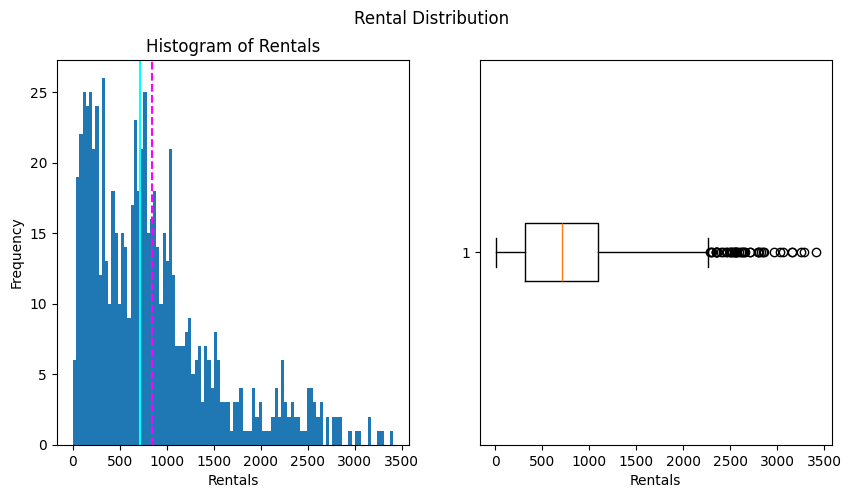

In [ ]:
# Plot histogram and box plot for rentals i.e label
import matplotlib.pyplot as plt

%matplotlib inline

# Get the label column
label = bike_data['rentals']

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# Plot the histogram of the label
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Rentals')
ax[0].set_title('Histogram of Rentals')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='--')
ax[0].axvline(label.median(), color='cyan', linestyle='-')

# Plot the box plot
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Rentals')

# Add a title to the figure
fig.suptitle('Rental Distribution')

# Show the figure
fig.show()

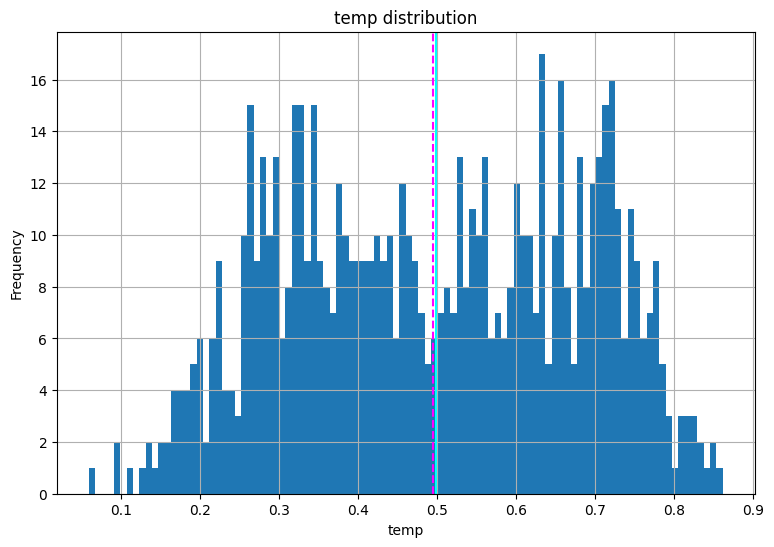

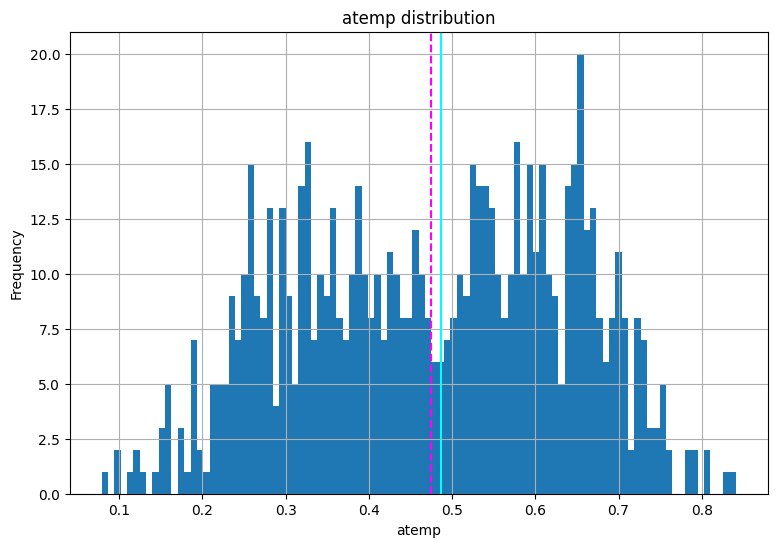

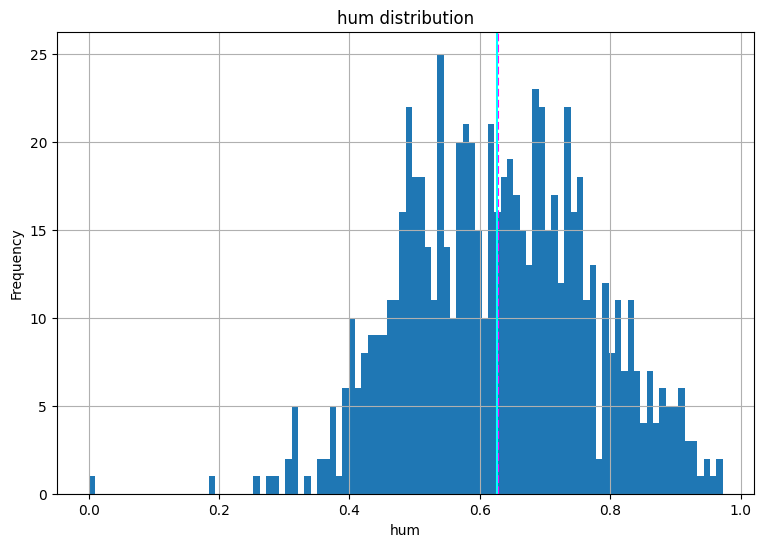

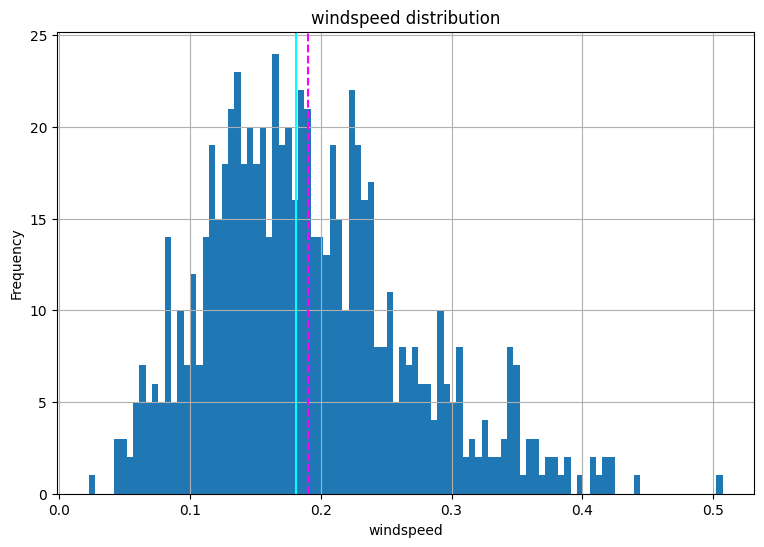

In [9]:
# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='--')
    ax.axvline(feature.median(), color='cyan', linestyle='-')
    ax.set_title(f'{col} distribution')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(col)
    fig.show()

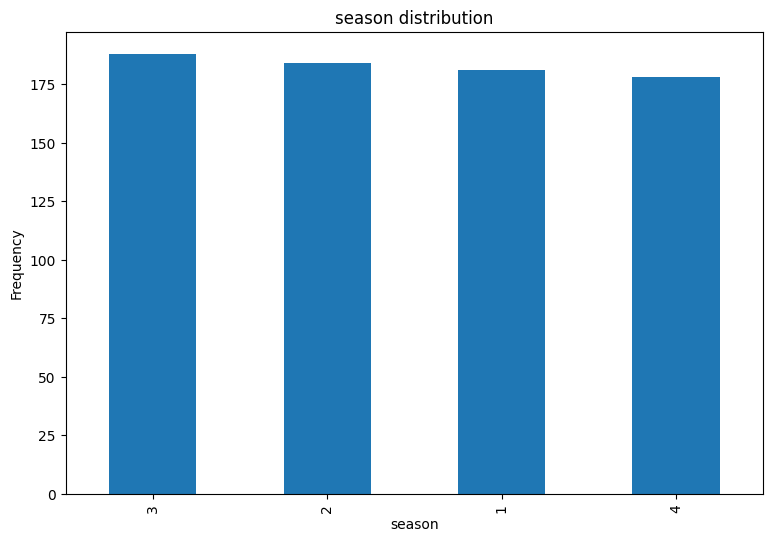

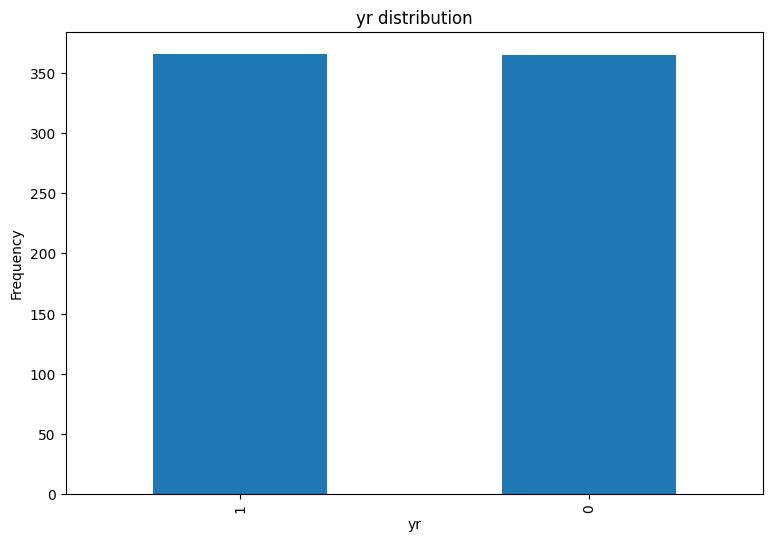

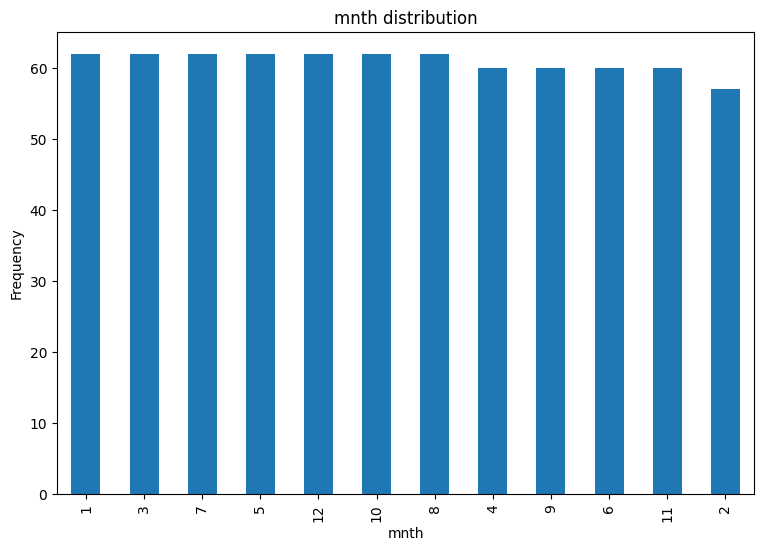

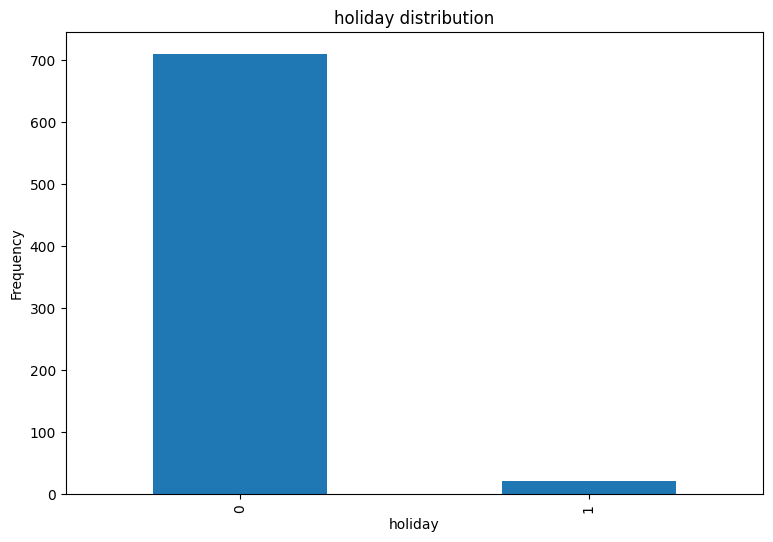

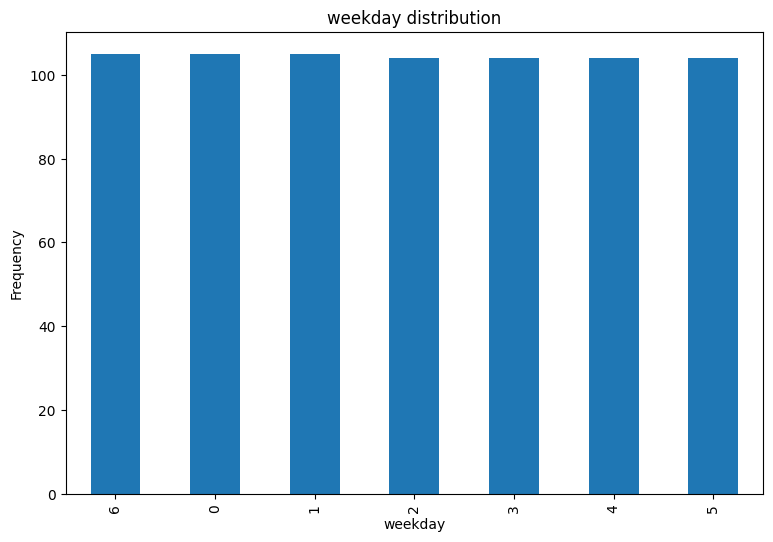

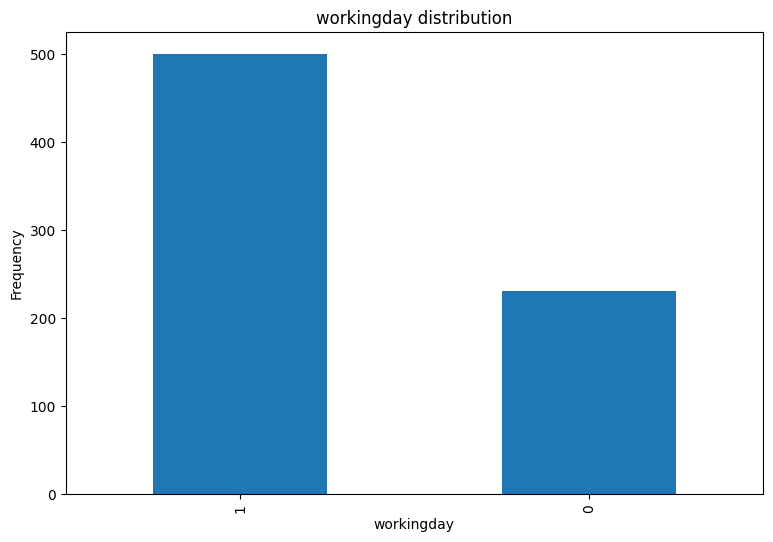

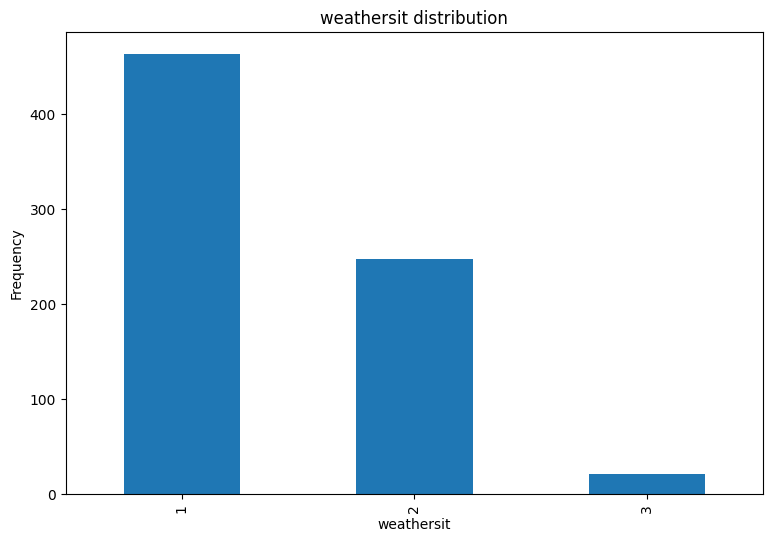

In [10]:
# Plot the categorical features

# ploat a bar plot for each categorical feature
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'{col} distribution')
    ax.set_ylabel('Frequency')




Many of the categorical features show a more or less _uniform_ distribution (meaning there's roughly the same number of rows for each category). Exceptions to this include:

**holiday**: There are many fewer days that are holidays than days that aren't.

**workingday**: There are more working days than non-working days.

**weathersit**: Most days are category _1_ (clear), with category _2_ (mist and cloud) the next most common. There are comparatively few category _3_ (light rain or snow) days, and no category _4_ (heavy rain, hail, or fog) days at all.


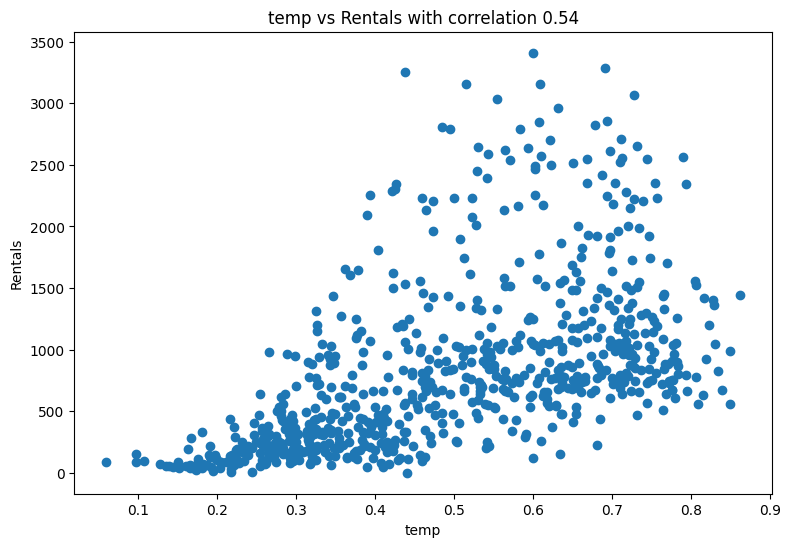

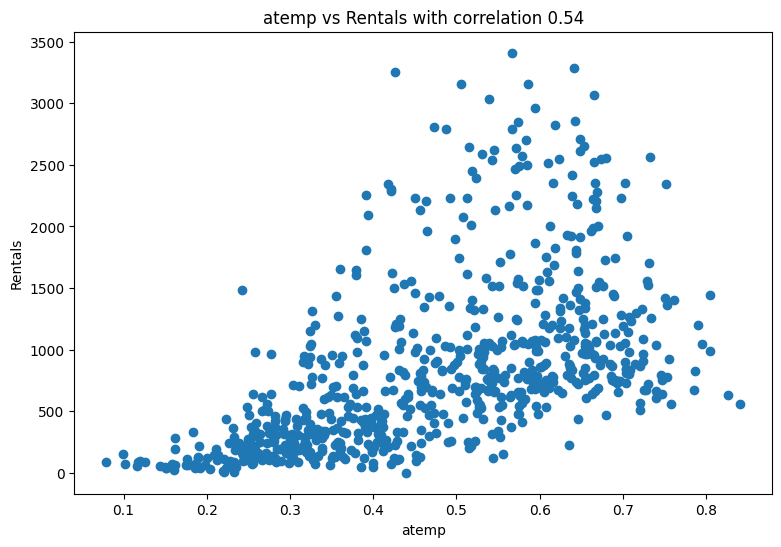

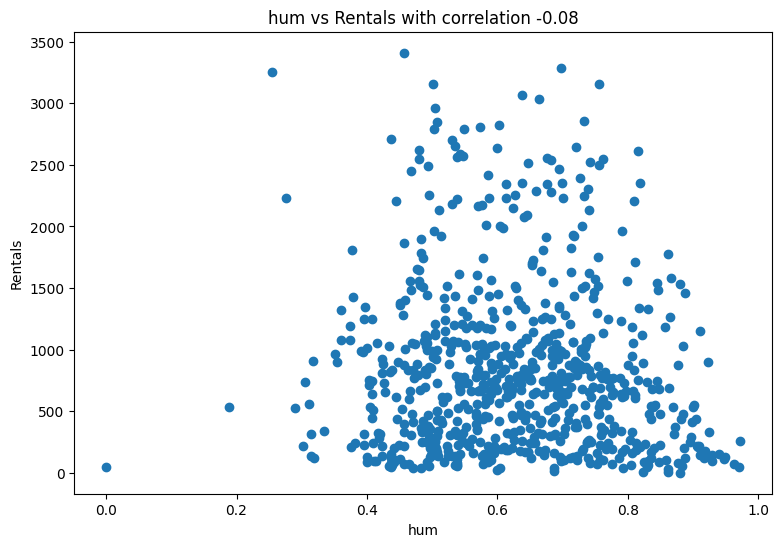

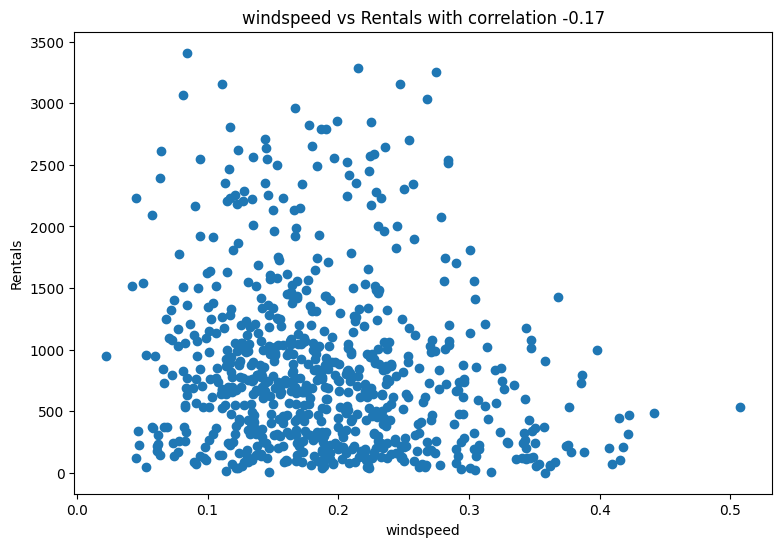

In [12]:
# Create scatter plot that show intersection of featues and labels value 
# and calculate the correlation statistic to quantify the relationship between features and labels

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_data[col]
    label = bike_data['rentals']
    correlation = feature.corr(label)
    ax.scatter(feature, label)
    ax.set_ylabel('Rentals')
    ax.set_xlabel(col)
    ax.set_title(f'{col} vs Rentals with correlation {correlation:.2f}')
    fig.show()

plt.show()


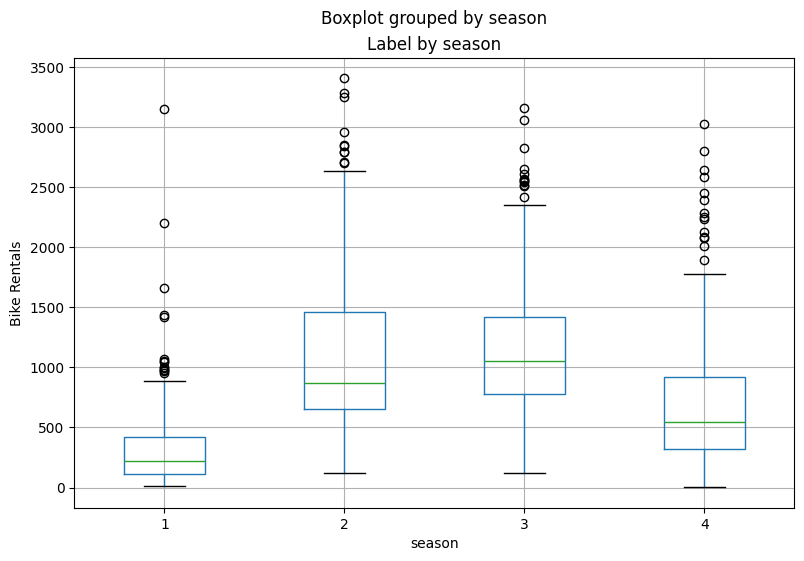

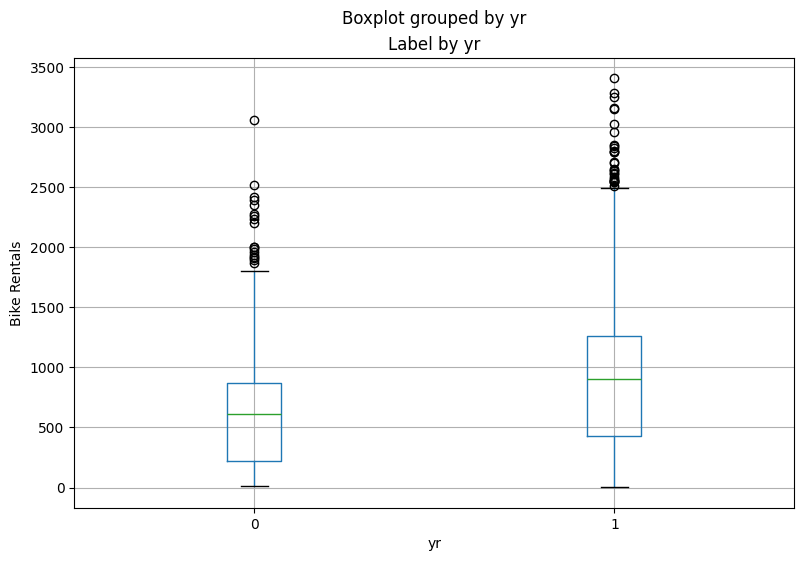

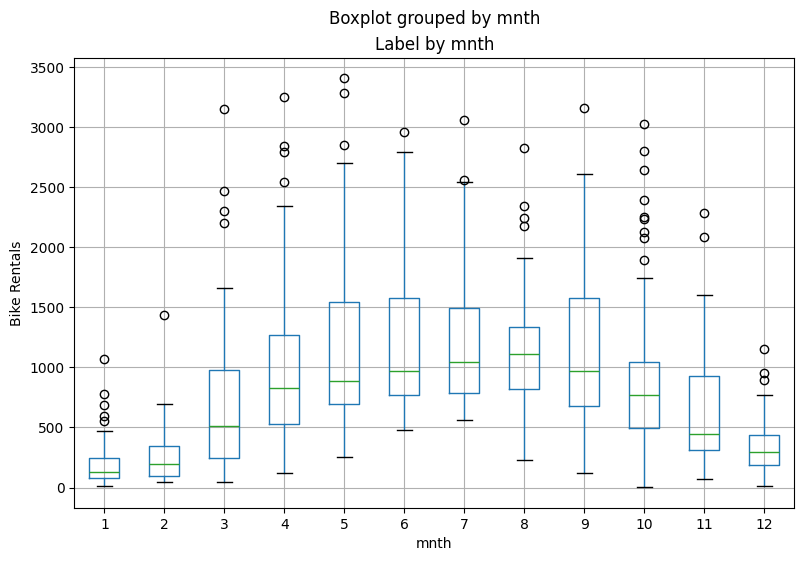

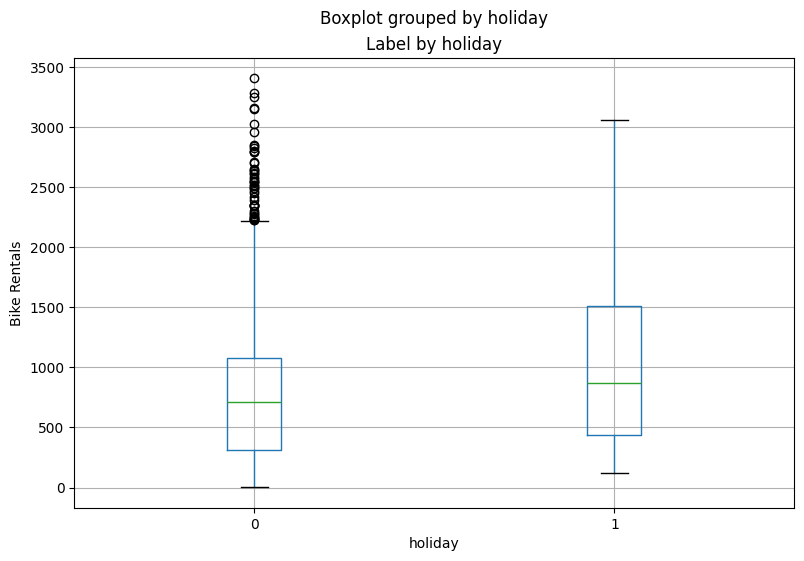

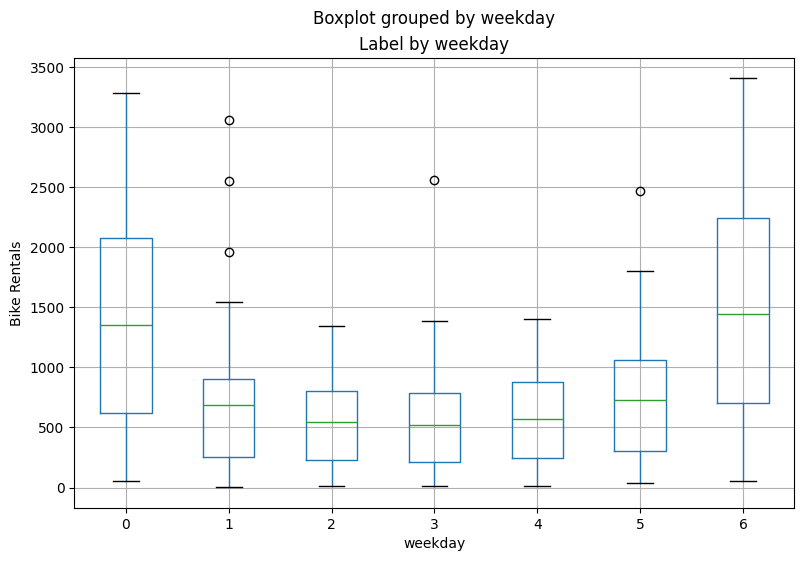

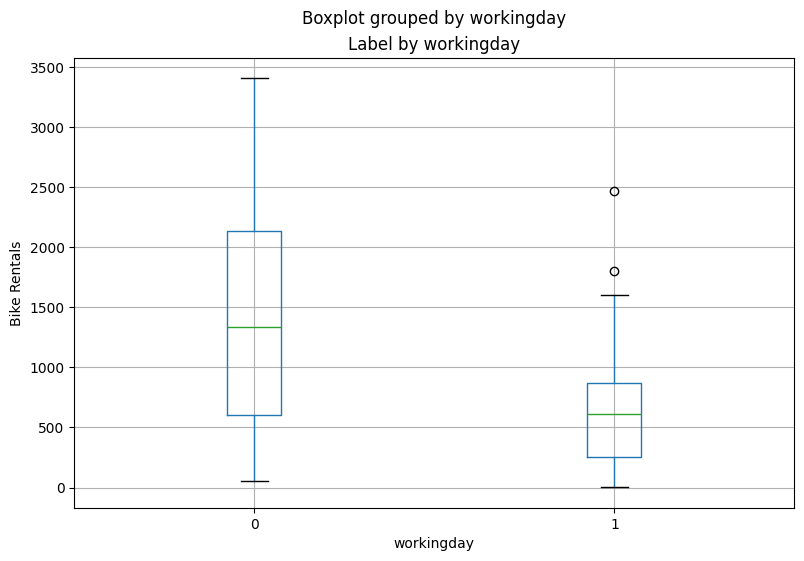

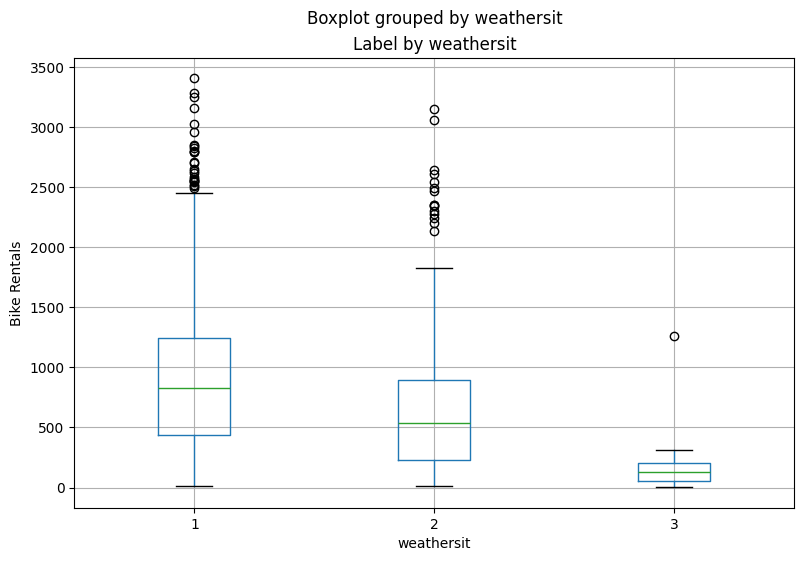

In [13]:
# plot a boxplot for the label by each categorical feature
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    bike_data.boxplot(column = 'rentals', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

The plots show some variance in the relationship between some category values and rentals. For example, there's a clear difference in the distribution of rentals on weekends (**weekday** 0 or 6) and those during the working week (**weekday** 1 to 5). Similarly, there are notable differences for **holiday** and **workingday** categories. There's a noticeable trend that shows different rental distributions in summer and fall months compared to spring and winter months. The **weathersit** category also seems to make a difference in rental distribution. The **day** feature we created for the day of the month shows little variation, indicating that it's probably not predictive of the number of rentals.

# Train a Regression Model

In [19]:
# Separate features and label
X = bike_data[['season', 'mnth', 'holiday', 'weekday', 'workingday', 
               'weathersit', 'temp', 'atemp', 'hum', 'windspeed']].values
y = bike_data['rentals'].values

#print('Features:', X[:10], '\nLabels:', y[:10], sep='\n')

In [20]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

# Split the data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [21]:
# Train the model
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Fit a linear regression model on the training set
model.fit(X_train, y_train)

print(model)

LinearRegression()


# Evaluate the trained model

In [22]:
import numpy as np

predictions = model.predict(X_test)

np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels: ', y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels:  [2418  754  222   47  244  145  240  555 3252   38]


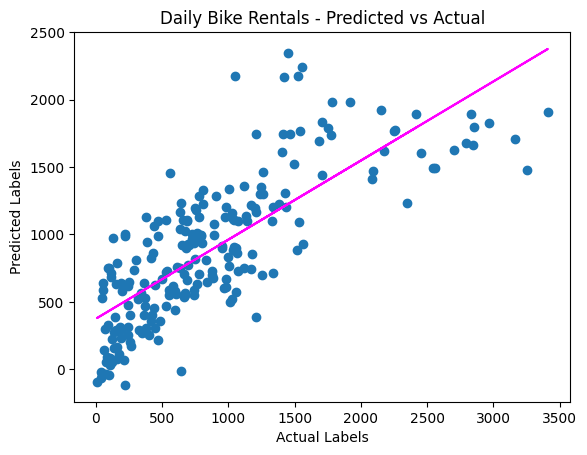

In [24]:
# Visualize the predicted vs actual values

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Rentals - Predicted vs Actual')
# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


There's a definite diagonal trend, and the intersections of the predicted and actual values are generally following the path of the trend line; but there's a fair amount of difference between the ideal function represented by the line and the results. This variance represents the residuals of the model - in other words, the difference between the label predicted when the model applies the coefficients it learned during training to the validation data, and the actual value of the validation label. These residuals when evaluated from the validation data indicate the expected level of error when the model is used with new data for which the label is unknown

evaluation metrics. We'll focus on the following three:

Mean Square Error (MSE): The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model

Root Mean Square Error (RMSE): The square root of the MSE. This yields an absolute metric in the same unit as the label (in this case, numbers of rentals). The smaller the value, the better the model (in a simplistic sense, it represents the average number of rentals by which the predictions are wrong!)

Coefficient of Determination (usually known as R-squared or R2): A relative metric in which the higher the value, the better the fit higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explai

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035595
RMSE: 449.4135728595165
R2: 0.604045473691919


# Experiment with Algorithms

The linear regression algorithm we used to train the model has some predictive capability, but there are many kinds of regression algorithm we could try, including:

**Linear algorithms**: Not just the Linear Regression algorithm we used above (which is technically an Ordinary Least Squares algorithm), but other variants such as _Lasso_ and _Ridge_.

**Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction.

**Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

# Another Linear Algorithm - Lasso

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


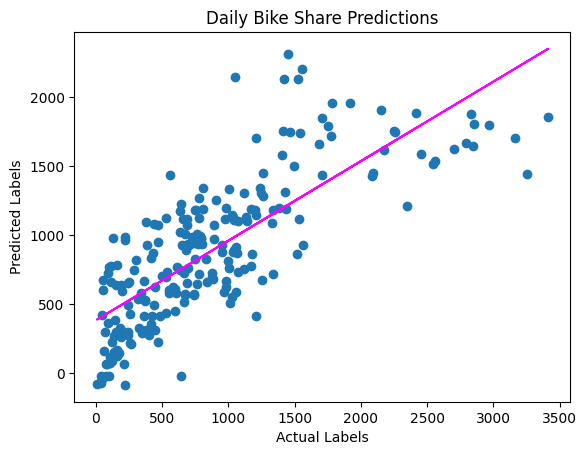

In [26]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Try a Decision Tree Algorithm

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_6 <= 0.29
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_6 >  0.29
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_9 <= 0.28
|   |   |   |   |   |   |--- feature_8 <= 0.37
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |   |--- feature_8 >  0.37
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_9 >  0.28
|   |   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |   |   |--- val

MSE: 233182.62272727274
RMSE: 482.889866043255
R2: 0.5428601035339916


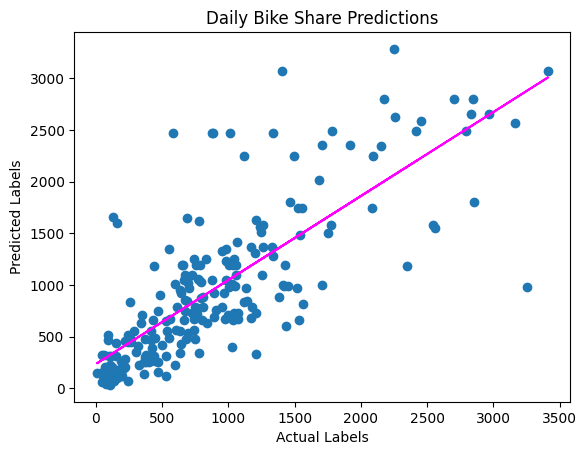

In [28]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

 # Try a Ensemble Algorithm

 Ensemble algorithms work by combining multiple base estimators to produce an optimal model, either by applying an aggregate function to a collection of base models (sometimes referred to a bagging) or by building a sequence of models that build on one another to improve predictive performance (referred to as boosting).
 

## Try Random Forest

RandomForestRegressor() 

MSE: 111723.91783590907
RMSE: 334.2512794828302
R2: 0.780972271282757


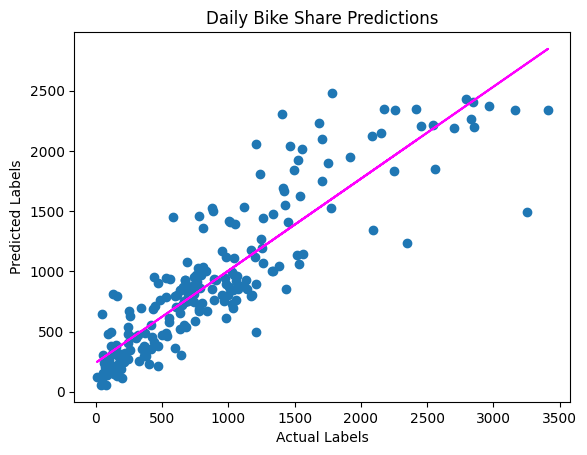

In [29]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Try Boosting Ensemble Algorithm`

GradientBoostingRegressor() 

MSE: 104052.8187444144
RMSE: 322.5721915237183
R2: 0.7960109795855101


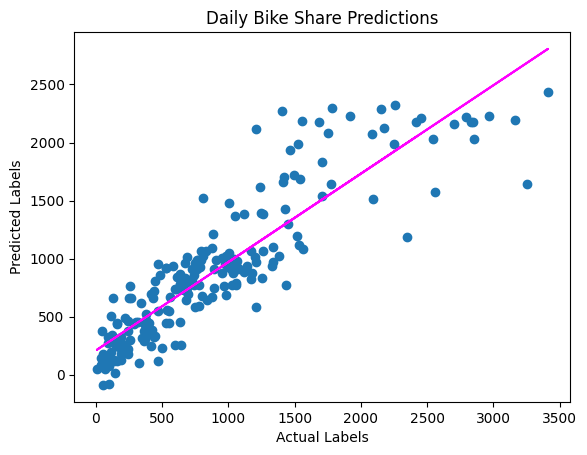

In [30]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Optimizing the Hyperparameter

Let's try using a _grid search_ approach to try combinations from a grid of possible values for the **learning_rate** and **n_estimators** hyperparameters of the **GradientBoostingRegressor** estimator.

In [32]:
# Grid Search Approach for Gradient Boosting Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
param_grid = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 150]
}

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)

# Search multiple values
grid_search = GridSearchCV(estimator=alg, param_grid=param_grid, scoring=score, cv=3, return_train_score=True)

# Train the model
grid_search.fit(X_train, y_train)

print('Best parameter combination: ', grid_search.best_params_, '\n')

Best parameter combination:  {'learning_rate': 0.1, 'n_estimators': 100} 



In [33]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the model using the test data
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 104410.20721742649
RMSE: 323.1256833144442
R2: 0.7953103419151724


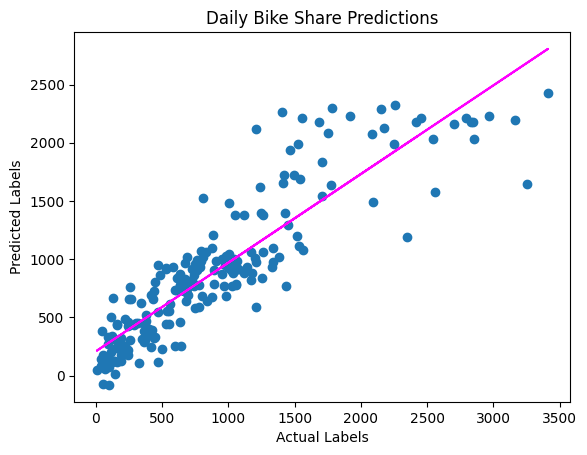

In [34]:
# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

# Preprocess the data

In [35]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


MSE: 104824.26361489657
RMSE: 323.76575423428676
R2: 0.79449861033562


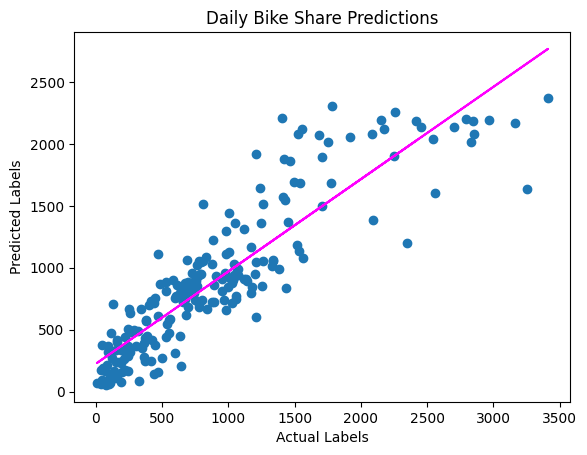

In [36]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

MSE: 104824.26361489657
RMSE: 323.76575423428676
R2: 0.79449861033562


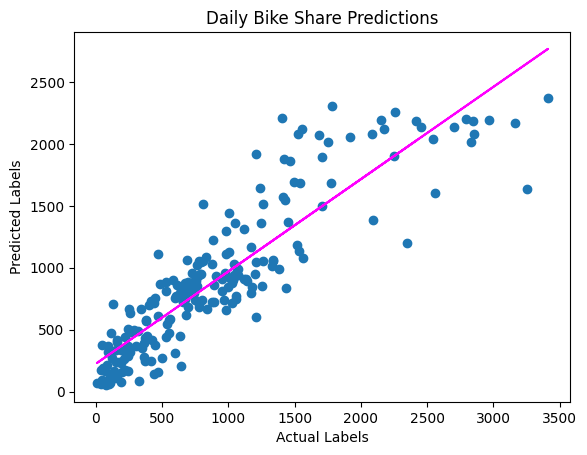

In [37]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 103330.66300727271
RMSE: 321.45087184089687
R2: 0.7974267205830518


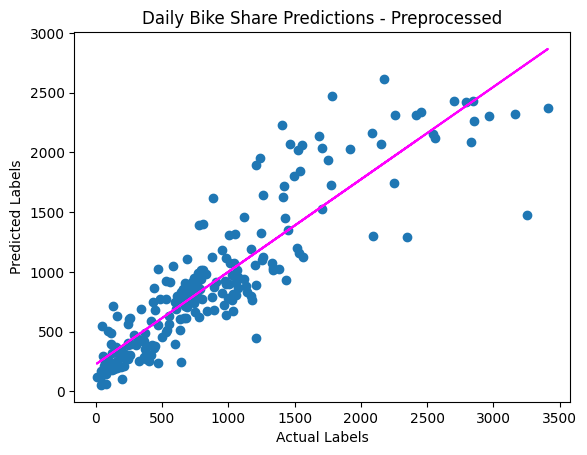

In [38]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()